In [2]:
%%capture
pip install pycaret

In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [4]:
train_df = pd.read_csv("/kaggle/input/csgo-classification-ru/train.csv")
test_df = pd.read_csv("/kaggle/input/csgo-classification-ru/test.csv")
sample = pd.read_csv("/kaggle/input/csgo-classification-ru/sample_submission.csv")

In [5]:
test_df.head(15)

,id,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1,49.95,8.0,15.0,de_dust2,False,300.0,500.0,300.0,491.0,150.0,10400.0,2.0,5.0,1.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,114.95,6.0,6.0,de_dust2,False,500.0,500.0,499.0,484.0,10200.0,27050.0,0.0,5.0,0.0,5.0,5.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,2.0,5.0,1.0,0.0,0.0,4.0,0.0,0.0
2,3,175.00,7.0,8.0,de_dust2,False,500.0,500.0,400.0,200.0,600.0,500.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,14.92,0.0,4.0,de_overpass,False,232.0,320.0,300.0,311.0,3300.0,18850.0,2.0,4.0,2.0,3.0,4.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0
4,5,37.52,13.0,11.0,de_train,True,290.0,422.0,291.0,415.0,1900.0,23100.0,2.0,5.0,1.0,3.0,5.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,6,54.96,5.0,4.0,de_dust2,False,203.0,478.0,267.0,477.0,750.0,17100.0,1.0,5.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0
6,7,94.94,4.0

In [6]:
train_df.iloc[58107:58108]

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
58107,174.94,5.0,6.0,de_vertigo,False,500.0,500.0,0.0,273.0,23900.0,32450.0,0.0,3.0,0.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T


In [7]:
train_df.iloc[:15]

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
0,114.95,4.0,0.0,de_inferno,False,500.0,500.0,493.0,400.0,3600.0,10200.0,4.0,2.0,2.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,CT
1,114.92,7.0,4.0,de_dust2,False,500.0,500.0,0.0,500.0,11950.0,13950.0,0.0,5.0,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,T
2,74.88,4.0,6.0,de_overpass,False,270.0,200.0,292.0,200.0,1700.0,7200.0,1.0,2.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,CT
3,21.46,1.0,1.0,de_nuke,True,100.0,268.0,100.0,385.0,150.0,1750.0,1.0,4.0,0.0,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,T
4,175.00,9.0,6.0,de_mirage,False,500.0,500.0,200.0,300.0,2700.0,650.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
5,66.88,5.0,1.0,de_mirage,False,291.0,233.0,277.0,95.0,9700.0,6400.0,3.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,T
6,94.89,2

In [8]:
cat_cols = train_df.select_dtypes(include=['object']).columns.to_list()
float_cols = train_df.select_dtypes(exclude=['object']).columns.to_list()

print('Categorical Columns :',cat_cols)
print('Categorical Columns Count :',len(cat_cols))
print()
print('Float Columns Count :',len(float_cols))
print('Float Columns :',float_cols)

Categorical Columns : ['map', 'target']
Categorical Columns Count : 2

Float Columns Count : 95
Float Columns : ['time_left', 'ct_score', 't_score', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_negev', 't_weapon

# Winning Sides Distribution

In [9]:
### 'target' sütununun değerlerini say ve bir DataFrame'e dönüştür
winner = train_df['target'].value_counts()
winner.columns = ['category', 'count']

# Şimdi, Plotly Express ile pasta grafiğini oluştur
fig = px.pie(winner, values='target', names=['Terrorist','Counter-Terrorist'], hole=0.35, opacity=0.7)
#fig = px.pie(winner, values='target', names=['Terrorist','Counter-Terrorist'], hole=0.35, opacity=0.7)
fig.update_layout(title=dict(text="Winning Sides Distribution"))
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

# Map Play Rates

In [10]:
game_map = train_df['map'].value_counts()
winner.columns = ['category', 'count']

fig = px.pie(game_map, values='map', names = ["Inferno", "Dust2","Nuke","Mirage","Overpass","Train","Vertigo","Cache"], hole = 0.35, opacity = 0.7)
fig.update_layout(title = dict(text = "Map Play Rates"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

In [11]:
float_cols.remove("time_left")

In [12]:
train_df[float_cols] = train_df[float_cols].apply(lambda x: x.astype(int))
train_df['time_left'] = round(train_df['time_left']).astype(int)

In [13]:
test_df[float_cols] = test_df[float_cols].apply(lambda x: x.astype(int))
test_df['time_left'] = round(test_df['time_left']).astype(int)

In [14]:
test_df = test_df.drop(["id"],axis=1)

# Label Encoder

In [15]:
le = LabelEncoder()

train_df[cat_cols] = train_df[cat_cols].apply(lambda col: le.fit_transform(col))
test_df['map'] = le.fit_transform(test_df['map'])

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   time_left                     82014 non-null  int64
 1   ct_score                      82014 non-null  int64
 2   t_score                       82014 non-null  int64
 3   map                           82014 non-null  int64
 4   bomb_planted                  82014 non-null  int64
 5   ct_health                     82014 non-null  int64
 6   t_health                      82014 non-null  int64
 7   ct_armor                      82014 non-null  int64
 8   t_armor                       82014 non-null  int64
 9   ct_money                      82014 non-null  int64
 10  t_money                       82014 non-null  int64
 11  ct_helmets                    82014 non-null  int64
 12  t_helmets                     82014 non-null  int64
 13  ct_defuse_kits                8

# Correlation

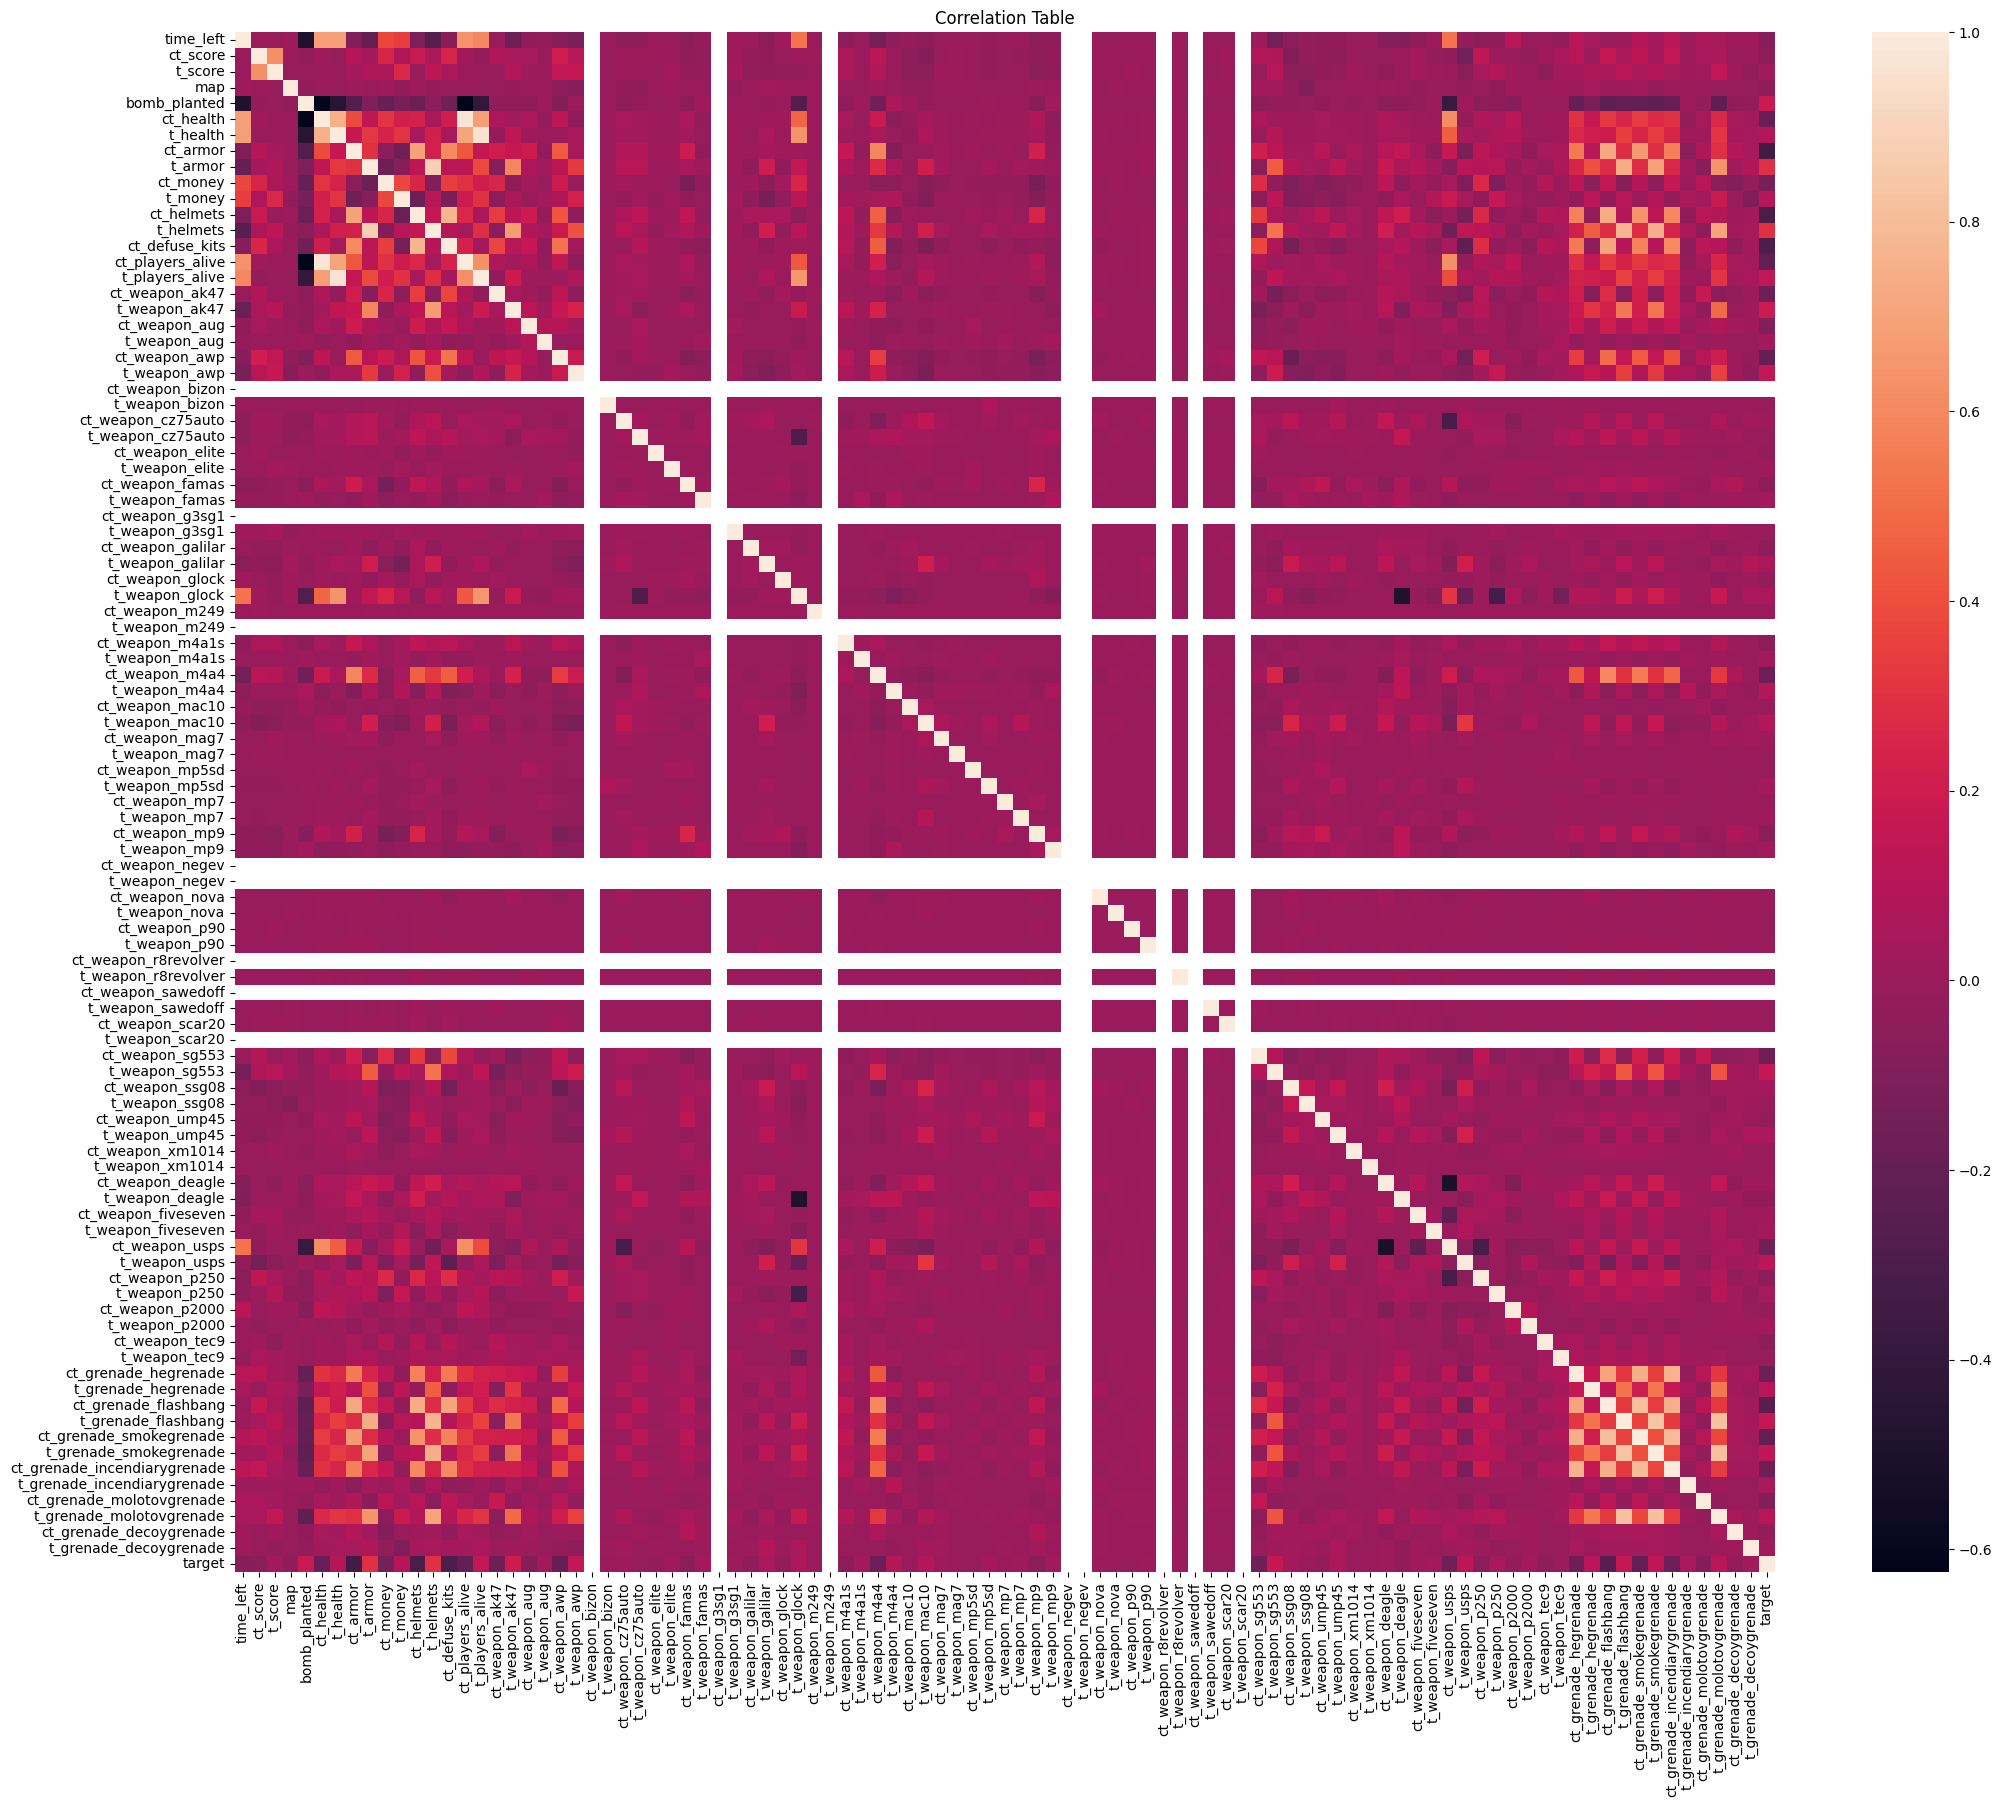

In [17]:
plt.figure(figsize=(25,20))
sns.heatmap(train_df.corr(), vmax=1,square=True)
plt.title("Correlation Table")
plt.show()

In [18]:
x = train_df.drop("target", axis = 1)
y = train_df[["target"]]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# PyCaret

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   time_left                     82014 non-null  int64
 1   ct_score                      82014 non-null  int64
 2   t_score                       82014 non-null  int64
 3   map                           82014 non-null  int64
 4   bomb_planted                  82014 non-null  int64
 5   ct_health                     82014 non-null  int64
 6   t_health                      82014 non-null  int64
 7   ct_armor                      82014 non-null  int64
 8   t_armor                       82014 non-null  int64
 9   ct_money                      82014 non-null  int64
 10  t_money                       82014 non-null  int64
 11  ct_helmets                    82014 non-null  int64
 12  t_helmets                     82014 non-null  int64
 13  ct_defuse_kits                8

In [21]:
from pycaret.classification import *

In [22]:
clf = setup(x, target = y,session_id=123) 

,Description,Value
0,Session id,123
1,Target,t_grenade_decoygrenade
2,Target type,Multiclass
3,Original data shape,"(82014, 96)"
4,Transformed data shape,"(82014, 96)"
5,Transformed train set shape,"(57409, 96)"
6,Transformed test set shape,"(24605, 96)"
7,Numeric features,95
8,Preprocess,True
9,Imputation type,simple


In [31]:
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9793,0.8809,0.9793,0.9770,0.9728,0.3219,0.4146,4.5500
rf,Random Forest Classifier,0.9785,0.8857,0.9785,0.9776,0.9708,0.2559,0.3735,3.9400
xgboost,Extreme Gradient Boosting,0.9773,0.8916,0.9773,0.9731,0.9692,0.2176,0.3154,5.2640
lightgbm,Light Gradient Boosting Machine,0.9763,0.8903,0.9763,0.9718,0.9676,0.1770,0.2645,5.2500
catboost,CatBoost Classifier,0.9759,0.8858,0.9759,0.9703,0.9658,0.1097,0.2104,35.2000
lr,Logistic Regression,0.9749,0.7208,0.9749,0.9504,0.9625,0.0000,0.0000,14.3860
ridge,Ridge Classifier,0.9749,0.0000,0.9749,0.9504,0.9625,0.0000,0.0000,0.2180
dummy,Dummy Classifier,0.9749,0.5000,0.9749,0.9504,0.9625,0.0000,0.0000,0.2020
ada,Ada Boost Classifier,0.9747,0.7075,0.9747,0.9505,0.9625,0.0032,0.0172,2.7960
gbc,Gradient Boosting Classifier,0.9747,0.8507,0.9747,0.9672,0.9634,0.0392,0.1070,26.7940


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [33]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

# Predicting Test Data

In [34]:
etc = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                           criterion='gini', max_depth=None, max_features='sqrt',
                           max_leaf_nodes=None, max_samples=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_jobs=-1, oob_score=False,
                           random_state=123, verbose=0, warm_start=False)

etc.fit(x_train, y_train)
pred = etc.predict(x_test)

# Model Evaluation
accuracy_test = accuracy_score(y_test, pred)

print("Model: ",etc)
print("")
print(f'Test Accuracy: {accuracy_test}')

Model:  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

Test Accuracy: 0.8605742851917332


In [35]:
predicted_arrays = etc.predict(test_df)
predicted_arrays

array([1, 1, 1, ..., 0, 1, 0])

In [36]:
predicted_arrays = pd.Series(predicted_arrays).map({0:"CT",1:"T"})
predicted_arrays

0         T
1         T
2         T
3         T
4         T
         ..
40391    CT
40392    CT
40393    CT
40394     T
40395    CT
Length: 40396, dtype: object

In [38]:
sample['target'] = predicted_arrays

In [39]:
sample.to_csv('submission.csv',index=False)